In [452]:
import pandas as pd

filepath = './data/consumption_temp.csv'
df = pd.read_csv(filepath)

display(df.head())

,time,location,consumption,temperature
0,2022-04-07 21:00:00,bergen,1.113325,-0.3
1,2022-04-07 21:00:00,oslo,4.092830,1.0
2,2022-04-07 21:00:00,stavanger,2.057858,1.3
3,2022-04-07 21:00:00,tromsø,1.246582,-3.9
4,2022-04-07 21:00:00,trondheim,1.970098,-2.8


In [453]:
# Convert 'time' to Pandas Timestamp
df['timestamp'] = pd.to_datetime(df['time'], format='%Y-%m-%d %H:%M:%S')
df = df.drop(columns=['time'])

# Check if there are missing timestamps
display(df['timestamp'].isnull().sum())

# Write the dataframe to a new CSV file
df.to_csv('./data/aneo.csv', index=False)
display(df.head())

0

,location,consumption,temperature,timestamp
0,bergen,1.113325,-0.3,2022-04-07 21:00:00
1,oslo,4.092830,1.0,2022-04-07 21:00:00
2,stavanger,2.057858,1.3,2022-04-07 21:00:00
3,tromsø,1.246582,-3.9,2022-04-07 21:00:00
4,trondheim,1.970098,-2.8,2022-04-07 21:00:00


## Data exploration and visualization

### Visualize seasonality in the consumption

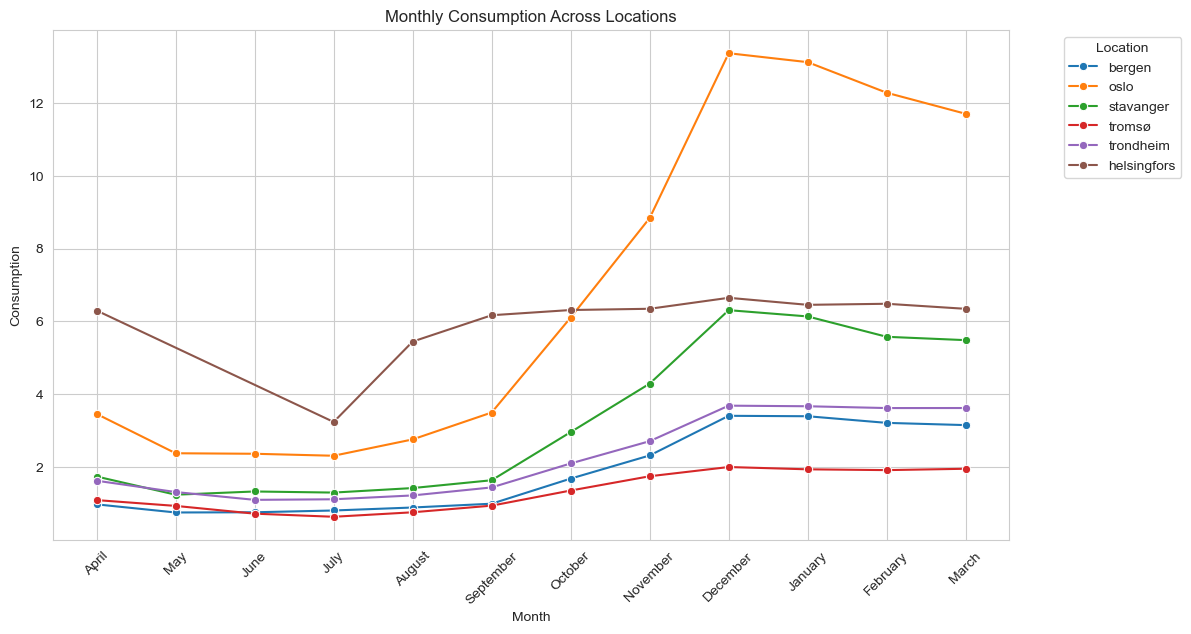

In [454]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


# Extracting month from the 'timestamp' column and creating a new column 'month'
# Note: For a precise analysis, you would need a dataset that spans multiple years
df['month'] = df['timestamp'].dt.month_name()

# Sorting values by 'timestamp' to ensure the line plot is ordered correctly
df = df.sort_values('timestamp')

# Set aesthetic style of the plots
sns.set_style("whitegrid")

# Initialize a figure
plt.figure(figsize=(12, 6))

# Line plot for consumption
sns.lineplot(data=df, x='month', y='consumption', hue='location', marker="o", errorbar=None)

# Title and labels
plt.title('Monthly Consumption Across Locations')
plt.xlabel('Month')
plt.ylabel('Consumption')
plt.legend(title='Location', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


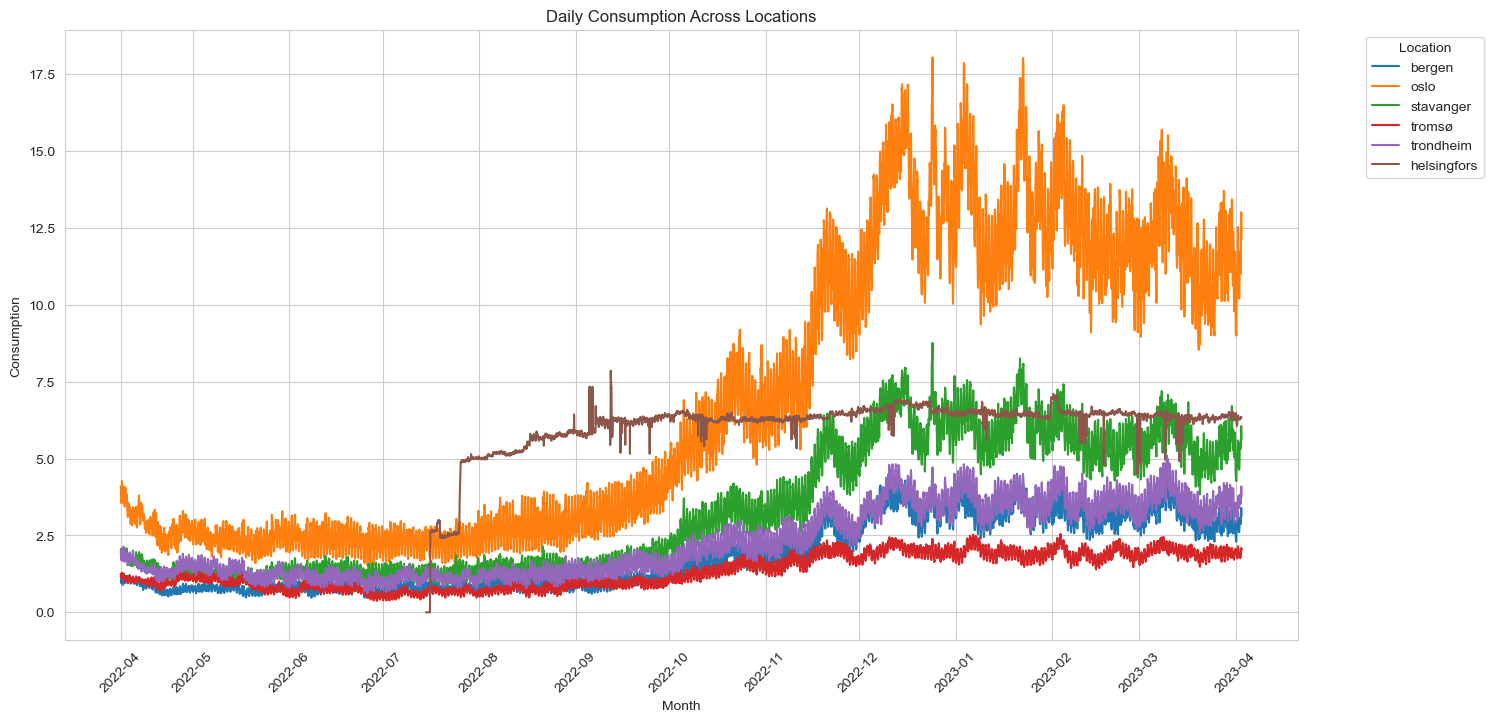

In [455]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you've already loaded the data into a dataframe named 'df'

# Extracting month and year from the 'timestamp' column and creating a new column 'month_year'
df['month_year'] = df['timestamp'].dt.strftime('%Y-%m')

# Sorting values by 'timestamp' to ensure the line plot is ordered correctly
df = df.sort_values('timestamp')

# Set aesthetic style of the plots
sns.set_style("whitegrid")

# Initialize a figure
plt.figure(figsize=(15, 7))

# Line plot for daily consumption
ax = sns.lineplot(data=df, x='timestamp', y='consumption', hue='location', errorbar=None)

# Title and labels
plt.title('Daily Consumption Across Locations')
plt.xlabel('Month')
plt.ylabel('Consumption')
plt.legend(title='Location', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust x-axis labels to display only the start of each month
# Extract unique month-year combinations and set them as x-tick labels
unique_month_years = df['month_year'].unique()
ax.set_xticks([df[df['month_year'] == month_year]['timestamp'].iloc[0] for month_year in unique_month_years])
ax.set_xticklabels(unique_month_years)

# Show plot
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


In [456]:
# Check the first and last timestamp value for Helsingsfors
print("First timestamp value for Helsingsfors: ", df[df['location'] == 'helsingfors']['timestamp'].iloc[0])
print("Last timestamp value for Helsingsfors: ", df[df['location'] == 'helsingfors']['timestamp'].iloc[-1])

First timestamp value for Helsingsfors:  2022-07-14 21:00:00
Last timestamp value for Helsingsfors:  2023-04-02 21:00:00


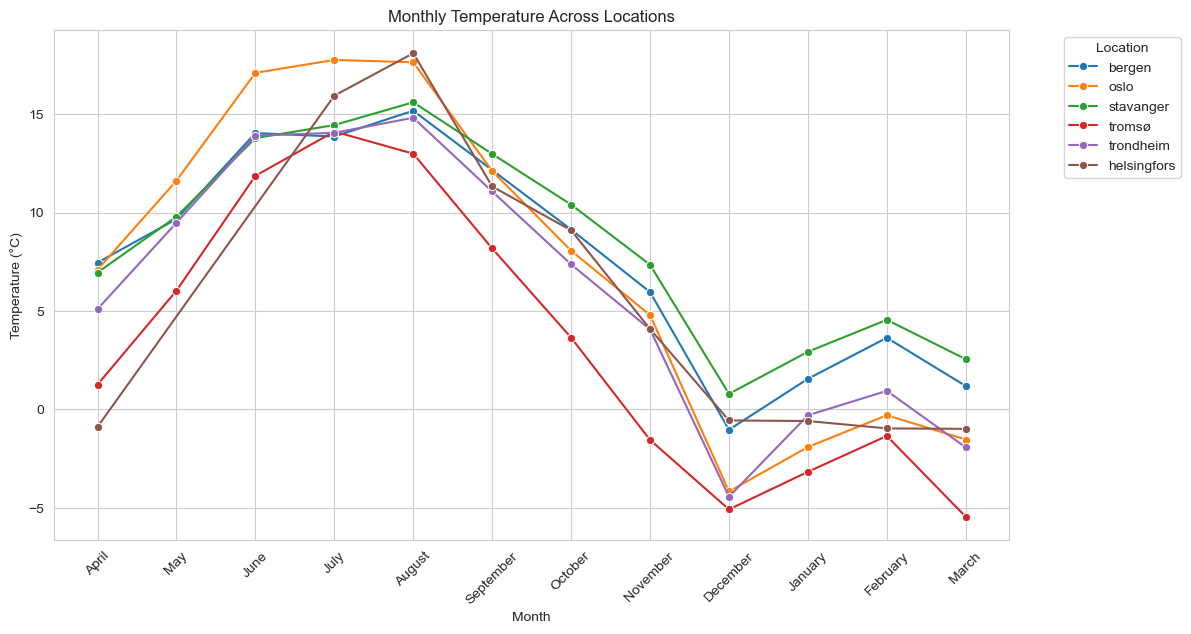

In [457]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set aesthetic style of the plots
sns.set_style("whitegrid")

# Initialize a figure
plt.figure(figsize=(12, 6))

# Line plot for temperature
sns.lineplot(data=df, x='month', y='temperature', hue='location', marker="o", errorbar=None)

# Title and labels
plt.title('Monthly Temperature Across Locations')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.legend(title='Location', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


### Scatter plots to visualize the relationship between consumption and temperature

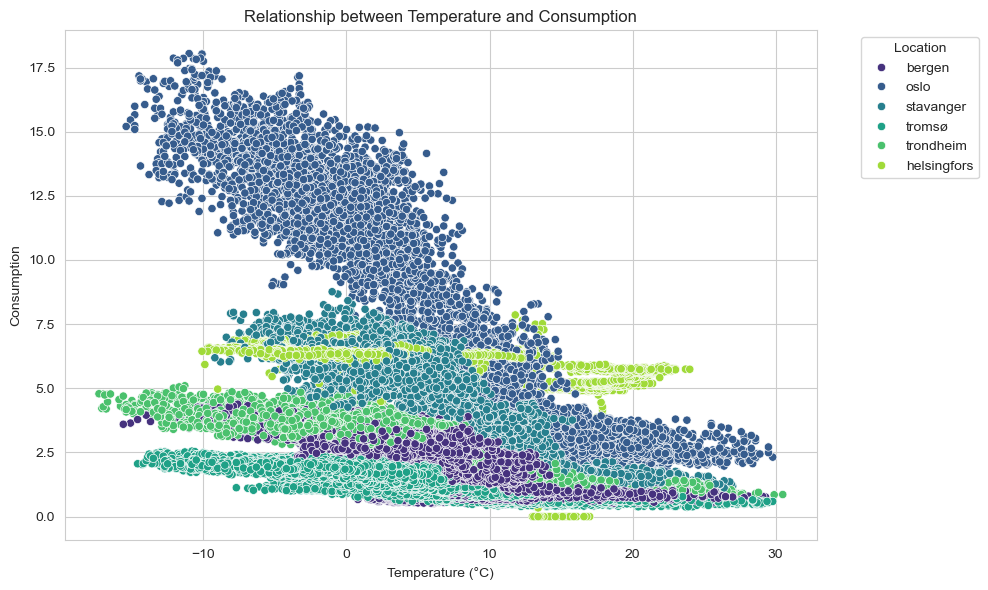

In [458]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set aesthetic style of the plots
sns.set_style("whitegrid")

# Initialize a figure
plt.figure(figsize=(10, 6))

# Create a scatter plot
sns.scatterplot(data=df, x='temperature', y='consumption', hue='location', palette='viridis')

# Title and labels
plt.title('Relationship between Temperature and Consumption')
plt.xlabel('Temperature (°C)')
plt.ylabel('Consumption')
plt.legend(title='Location', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.tight_layout()
plt.show()


In the visualization above, it seems there are some outliers for Helsingfors where consumption is 0. Perhaps this correlates the the time period where Helsingfors in missing data.

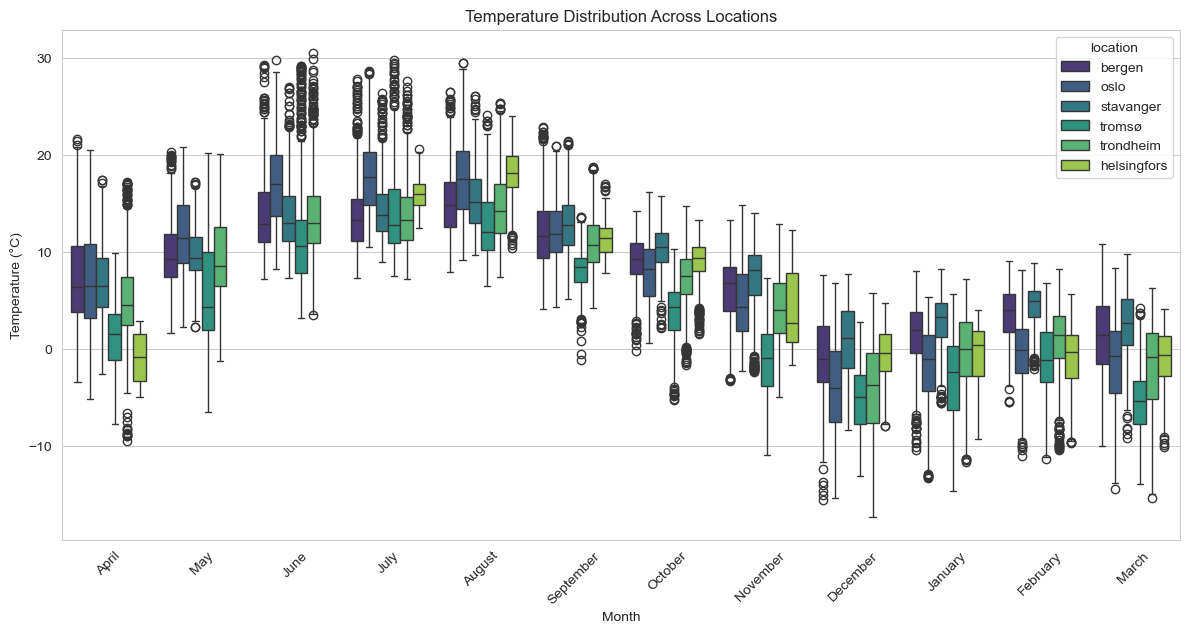

In [459]:
# Visualize temperature each month for each location
import seaborn as sns
import matplotlib.pyplot as plt

# Set aesthetic style of the plots
sns.set_style("whitegrid")

# Initialize a figure
plt.figure(figsize=(12, 6))

# Create a box plot
sns.boxplot(data=df, x='month', y='temperature', hue='location', palette='viridis')

# Title and labels
plt.title('Temperature Distribution Across Locations')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')

# Show plot
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()



### Correlation Analysis: Check if there's a correlation between energy consumption and temperature.

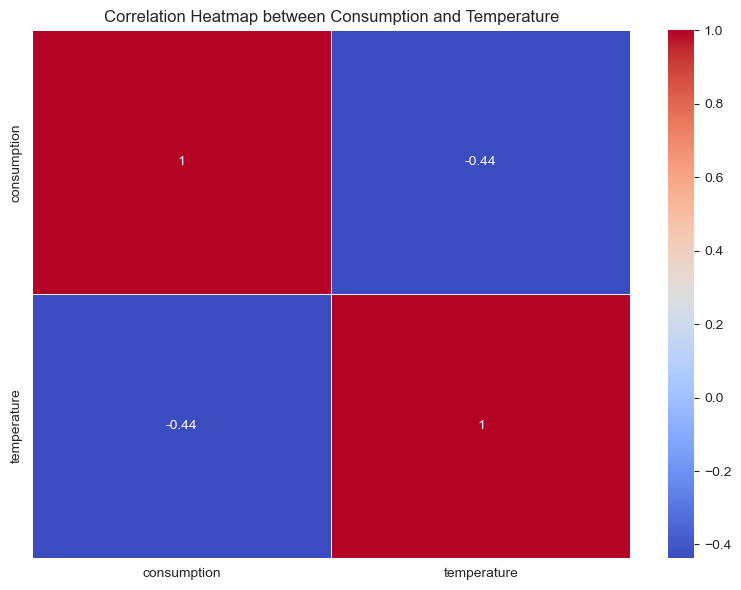

In [460]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = df[['consumption', 'temperature']].corr()

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Generate a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=.5)

# Title
plt.title('Correlation Heatmap between Consumption and Temperature')

# Show plot
plt.tight_layout()
plt.show()


- **1 (Upper Left)**: This is the correlation of consumption with itself, always 1.
- **1 (Lower Right)**: This is the correlation of temperature with itself, always 1.
- **-0.44 (Upper Right and Lower Left)**: A correlation coefficient of `−0.44`. `−0.44` suggests a moderate negative linear relationship between consumption and temperature. This means that **as temperature increases, consumption tends to decrease (and vice-versa)**. However, the relationship is not very strong since `−0.44` is somewhat distant from `−1`.

Do keep in mind that correlation does not imply causation. While there's a correlation between these two variables, it doesn't necessarily mean that changes in temperature cause changes in consumption. Other factors might be at play, or the observed relationship might be coincidental.

### Boxplots to visualize the distribution of consumption and temperature across different locations.

/var/folders/6f/f4jmdnpx54s3hmfy9g0jlvch0000gn/T/ipykernel_24558/1980300686.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='location', y='consumption', ax=ax[0], palette="viridis")
/var/folders/6f/f4jmdnpx54s3hmfy9g0jlvch0000gn/T/ipykernel_24558/1980300686.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='location', y='temperature', ax=ax[1], palette="viridis")


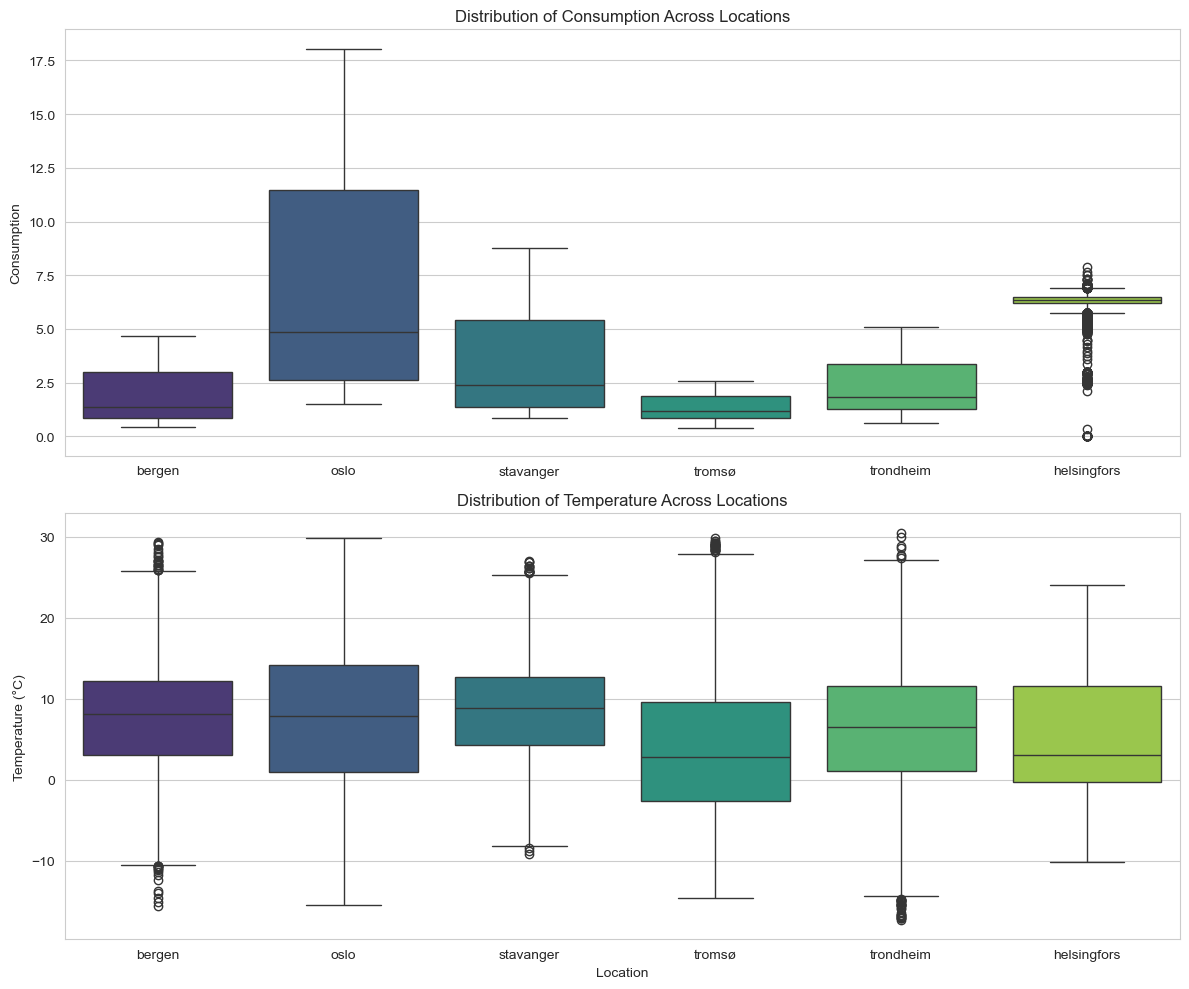

In [461]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set aesthetic style of the plots
sns.set_style("whitegrid")

# Initialize a figure with two subplots
fig, ax = plt.subplots(2, 1, figsize=(12, 10))

# Create a boxplot for the distribution of consumption across different locations
sns.boxplot(data=df, x='location', y='consumption', ax=ax[0], palette="viridis")
ax[0].set_title('Distribution of Consumption Across Locations')
ax[0].set_ylabel('Consumption')
ax[0].set_xlabel('')

# Create a boxplot for the distribution of temperature across different locations
sns.boxplot(data=df, x='location', y='temperature', ax=ax[1], palette="viridis")
ax[1].set_title('Distribution of Temperature Across Locations')
ax[1].set_ylabel('Temperature (°C)')
ax[1].set_xlabel('Location')

# Adjust and show plot
plt.tight_layout()
plt.show()


### Histograms: To understand the distribution of numerical data like consumption and temperature

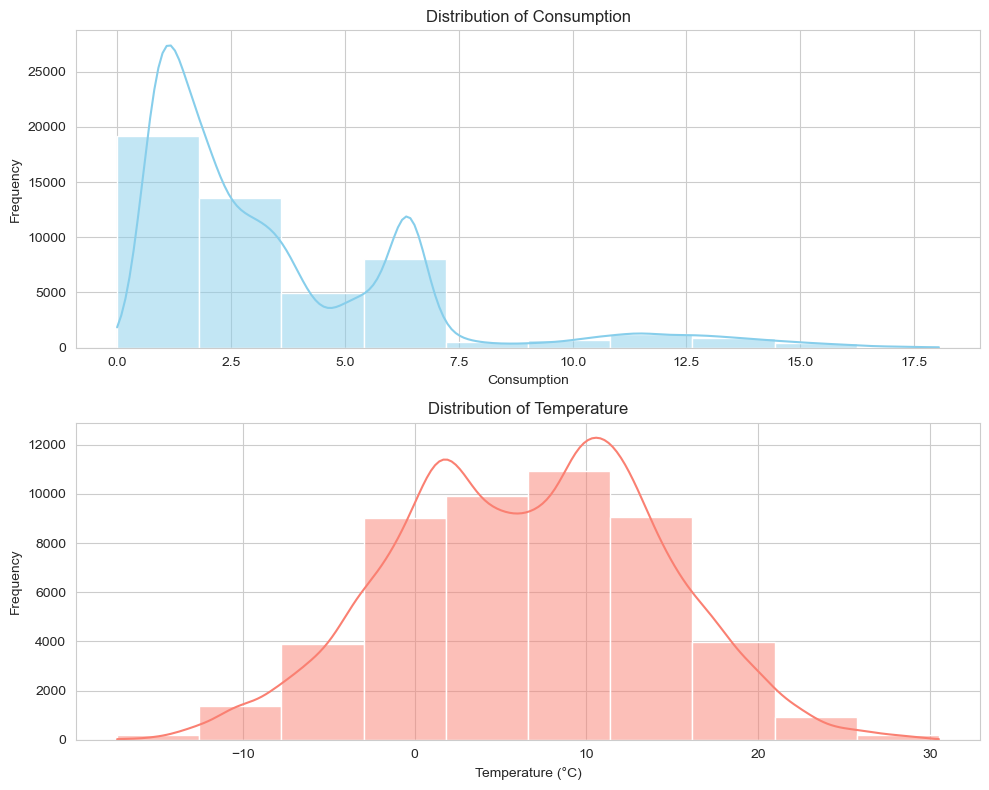

In [462]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set aesthetic style of the plots
sns.set_style("whitegrid")

# Initialize a figure with two subplots
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

# Histogram for consumption
sns.histplot(data=df, x='consumption', bins=10, kde=True, ax=ax[0], color='skyblue')
ax[0].set_title('Distribution of Consumption')
ax[0].set_xlabel('Consumption')
ax[0].set_ylabel('Frequency')

# Histogram for temperature
sns.histplot(data=df, x='temperature', bins=10, kde=True, ax=ax[1], color='salmon')
ax[1].set_title('Distribution of Temperature')
ax[1].set_xlabel('Temperature (°C)')
ax[1].set_ylabel('Frequency')

# Adjust and show plot
plt.tight_layout()
plt.show()


Basic Statistics for Consumption


count    49494.000000
mean         3.509242
std          3.096356
min          0.000000
25%          1.263256
50%          2.376530
75%          5.189000
max         18.045011
Name: consumption, dtype: float64


Basic Statistics for Temperature


count    49494.000000
mean         6.554019
std          7.630308
min        -17.299999
25%          1.000000
50%          6.800000
75%         12.100000
max         30.500000
Name: temperature, dtype: float64


Grouped Statistics for Consumption by Location


,count,mean,std,min,25%,50%,75%,max
location,,,,,,,,
bergen,8641.0,1.876716,1.156034,0.443192,0.834003,1.380962,2.998324,4.650816
helsingfors,6289.0,6.077242,0.919462,0.000000,6.189000,6.354000,6.474000,7.860000
oslo,8641.0,6.876428,4.672634,1.520560,2.610569,4.871180,11.458471,18.045011
stavanger,8641.0,3.304703,2.112962,0.832372,1.382764,2.390667,5.398822,8.763147
tromsø,8641.0,1.340776,0.559151,0.372637,0.831883,1.195308,1.874898,2.552159
trondheim,8641.0,2.278574,1.137311,0.620001,1.263027,1.841736,3.376217,5.099158



Grouped Statistics for Temperature by Location


,count,mean,std,min,25%,50%,75%,max
location,,,,,,,,
bergen,8641.0,7.750237,6.556976,-15.600000,3.1,8.1,12.2,29.299999
helsingfors,6289.0,5.662903,7.592141,-10.100000,-0.3,3.1,11.6,24.000000
oslo,8641.0,7.392883,8.770901,-15.400000,0.9,7.9,14.2,29.799999
stavanger,8641.0,8.547795,5.839943,-9.200000,4.3,8.9,12.7,27.000000
tromsø,8641.0,3.514119,7.967161,-14.600000,-2.6,2.8,9.6,29.799999
trondheim,8641.0,6.213621,7.616749,-17.299999,1.1,6.5,11.6,30.500000


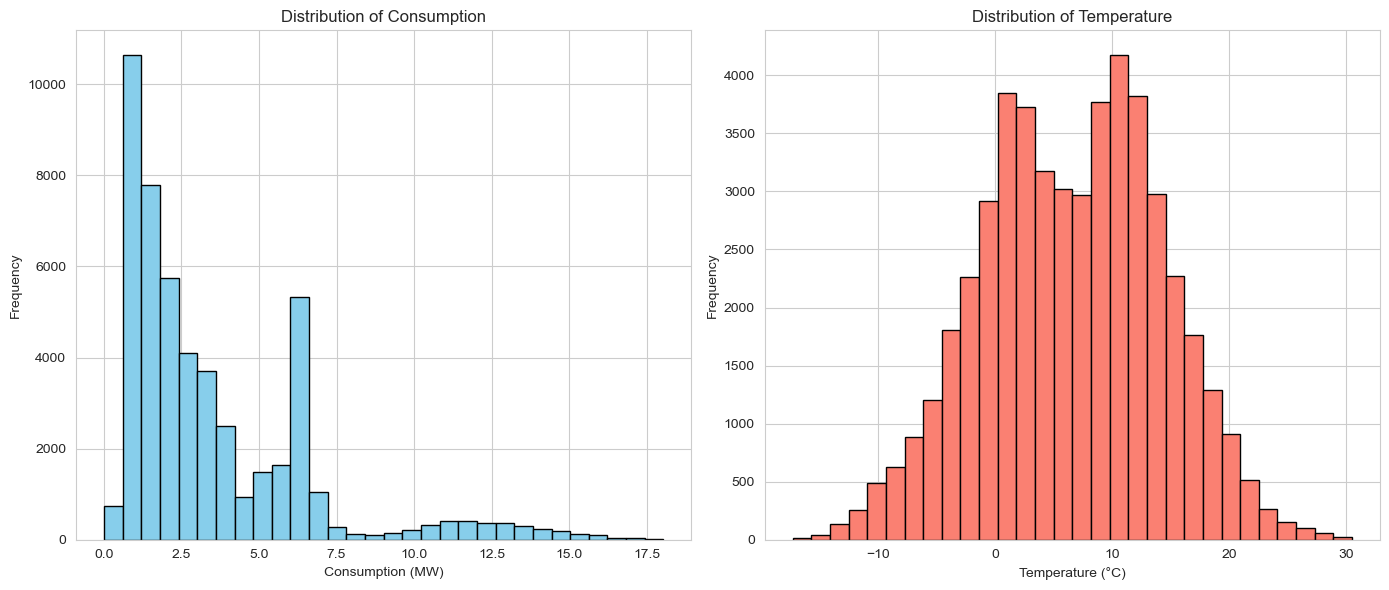

In [463]:
import pandas as pd
import matplotlib.pyplot as plt

# Basic statistical properties
stats_consumption = df['consumption'].describe()
stats_temperature = df['temperature'].describe()

print("Basic Statistics for Consumption")
display(stats_consumption)

print("\nBasic Statistics for Temperature")
display(stats_temperature)

# Grouped statistical properties by location
grouped_stats_consumption = df.groupby('location')['consumption'].describe()
grouped_stats_temperature = df.groupby('location')['temperature'].describe()

print("\nGrouped Statistics for Consumption by Location")
display(grouped_stats_consumption)

print("\nGrouped Statistics for Temperature by Location")
display(grouped_stats_temperature)

# Visualizing the distribution of 'consumption' and 'temperature'
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

ax[0].hist(df['consumption'], bins=30, color='skyblue', edgecolor='black')
ax[0].set_title('Distribution of Consumption')
ax[0].set_xlabel('Consumption (MW)')
ax[0].set_ylabel('Frequency')

ax[1].hist(df['temperature'], bins=30, color='salmon', edgecolor='black')
ax[1].set_title('Distribution of Temperature')
ax[1].set_xlabel('Temperature (°C)')
ax[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


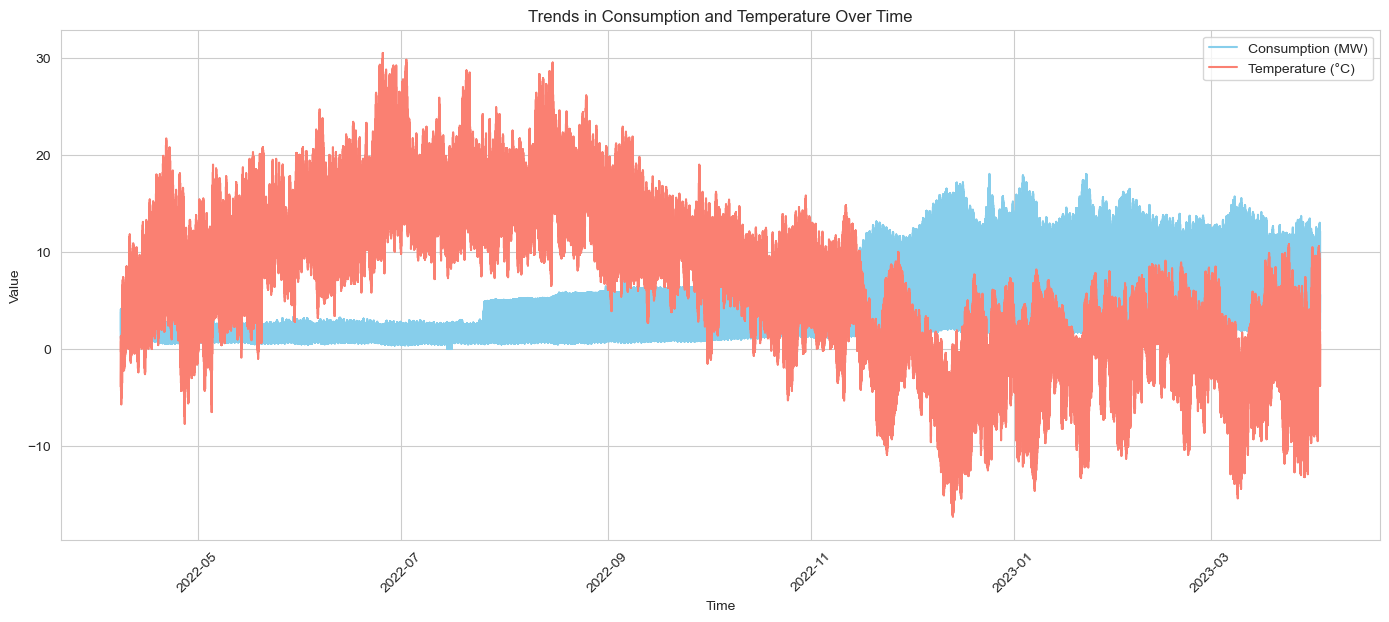

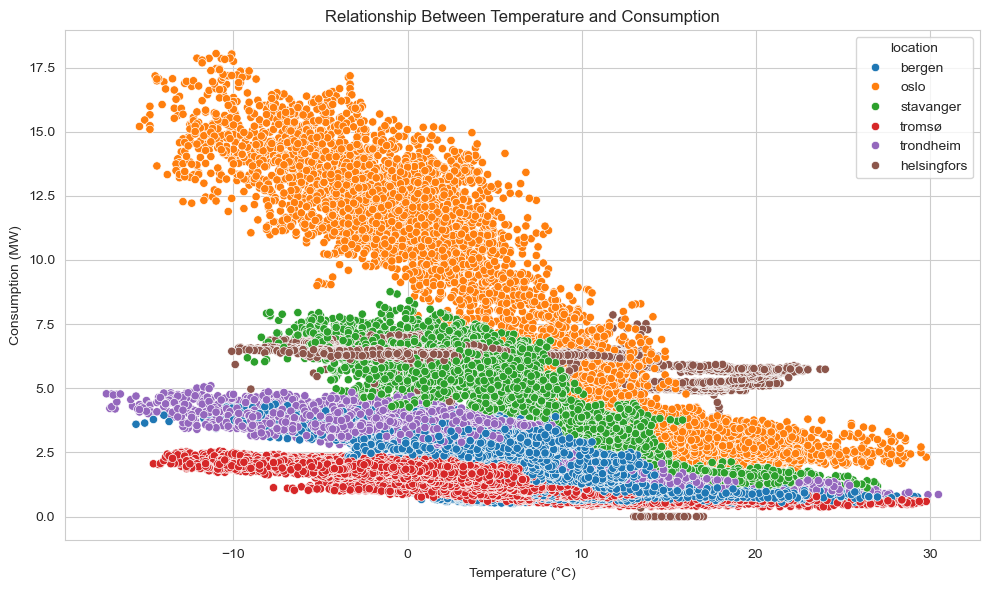

Correlation between Temperature and Consumption: -0.44


In [464]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set aesthetic style of the plots
sns.set_style("whitegrid")

# Visualizing trends in consumption and temperature overtimestamp 
plt.figure(figsize=(14, 6))
plt.plot(df['timestamp'], df['consumption'], label='Consumption (MW)', color='skyblue')
plt.plot(df['timestamp'], df['temperature'], label='Temperature (°C)', color='salmon')
plt.title('Trends in Consumption and Temperature Over Time')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

# Visualizing relationship between temperature and consumption
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['temperature'], y=df['consumption'], hue=df['location'])
plt.title('Relationship Between Temperature and Consumption')
plt.xlabel('Temperature (°C)')
plt.ylabel('Consumption (MW)')
plt.tight_layout()
plt.show()

# Calculating and displaying the correlation between temperature and consumption
correlation = df['temperature'].corr(df['consumption'])
print(f'Correlation between Temperature and Consumption: {correlation:.2f}')


In [465]:
# Remove coluns only used for visualizing

# Remove `month` and `month_year` columns
df = df.drop(columns=['month', 'month_year'])

## Preprocessing

In [466]:
import holidays

### Holiday binary encoding

# Extract date from 'time'
df['date'] = df['timestamp'].dt.date

# Get Norwegian holidays
no_holidays = holidays.country_holidays('NO')

# Create a feature for whether or not the date is a holiday
df['is_holiday'] = df['date'].isin(no_holidays)


### Other timestamp related features

# Extracting weekday feature
df['weekday'] = df['timestamp'].dt.weekday

# Creating features for timestamp of day
df['hour_of_day'] = df['timestamp'].dt.hour


### Lag feature

# Lag features for how the consumption was 5 days earlier
df['consumption_lag_5_days'] = df.sort_values('date').groupby(['hour_of_day', 'location'])['consumption'].shift(5)

# Display head of df after 10 days
after_ten_days = df[df['timestamp'] >= '2022-04-17']
display(after_ten_days.head())

# Check if there exists defined values for `consumption_lag_5_days`
display(df['consumption_lag_5_days'].isnull().sum())

,location,consumption,temperature,timestamp,date,is_holiday,weekday,hour_of_day,consumption_lag_5_days
1095,bergen,0.800265,4.6,2022-04-17,2022-04-17,False,6,0,0.955940
1096,oslo,2.561865,1.0,2022-04-17,2022-04-17,False,6,0,2.947374
1097,stavanger,1.413044,3.9,2022-04-17,2022-04-17,False,6,0,1.549012
1098,tromsø,0.872914,3.4,2022-04-17,2022-04-17,False,6,0,0.972963
1099,trondheim,1.311419,0.9,2022-04-17,2022-04-17,False,6,0,1.577439


720

In [467]:
### Seasonality feature

# Assuming that:
# 1 represents spring (March, April, May),
# 2 represents summer (June, July, August),
# 3 represents fall (September, October, November), 
# 4 represents winter (December, January, February)
seasons = {1: '4', 2: '4', 3: '1', 4: '1', 5: '1', 6: '2', 7: '2', 8: '2', 9: '3', 10: '3', 11: '3', 12: '4'}

# Apply the mapping to the 'month' column
df['season'] = df['timestamp'].dt.month.map(seasons)


### Temperature difference from the previous day at the same time

# If direction of change matters, we should keep neg/pos values (this is usually
# the case when working with data involving temperature differences)
# If only magnitude of change matters, we should take the absolute value
df['temperature_diff_prev_day'] = df.sort_values('date').groupby(['hour_of_day', 'location'])['temperature'].diff()


### Moving averages for consumption over the past week

# We apply a transform function to each location. Since each row in the data
# is a  by hour, and each location has 24 hours of data for each day,
# we can apply a rolling window of 168 (24*7) to get the past week's consumption
# grouped by each location
df['consumption_ma_week'] = df.groupby('location')['consumption'].transform(lambda x: x.rolling(24*7).mean())


### Rolling window statistics for consumption over the past week

df['consumption_max_week'] = df.groupby(['location'])['consumption'].transform(lambda x: x.rolling(24*7).max())
df['consumption_min_week'] = df.groupby(['location'])['consumption'].transform(lambda x: x.rolling(24*7).min())


### Exponential smoothing for consumption

# here x.ewm(alpha=0.5).mean() calculates the exponential weighted moving 
# average for consumption for each location. alpha=0.5 is the decay factor, 
# which controls the rate of decay. A large alpha will make the EWM more 
# responsive to recent values, while a small alpha will make the EWM respond 
# more to historical values. We can play around with this value.
df['consumption_ewm_alpha_0.5'] = df.groupby(['location'])['consumption'].apply(lambda x: x.ewm(alpha=0.5).mean()).reset_index(level=0, drop=True)

# Display head of df after 10 days
after_ten_days = df[df['timestamp'] >= '2022-04-17']
display(after_ten_days.head())



,location,consumption,temperature,timestamp,date,is_holiday,weekday,hour_of_day,consumption_lag_5_days,season,temperature_diff_prev_day,consumption_ma_week,consumption_max_week,consumption_min_week,consumption_ewm_alpha_0.5
1095,bergen,0.800265,4.6,2022-04-17,2022-04-17,False,6,0,0.955940,1,2.0,0.966094,1.190656,0.730350,0.827373
1096,oslo,2.561865,1.0,2022-04-17,2022-04-17,False,6,0,2.947374,1,-3.0,3.105356,3.805906,2.561865,2.615560
1097,stavanger,1.413044,3.9,2022-04-17,2022-04-17,False,6,0,1.549012,1,2.7,1.660030,1.960750,1.411603,1.456899
1098,tromsø,0.872914,3.4,2022-04-17,2022-04-17,False,6,0,0.972963,1,1.8,1.036481,1.212790,0.872914,0.918295
1099,trondheim,1.311419,0.9,2022-04-17,2022-04-17,False,6,0,1.577439,1,-2.2,1.571970,2.010728,1.265170,1.333047


In [468]:
# One-hot encoding

import pandas as pd


# Assuming df is your dataframe
df = pd.get_dummies(df, columns=['location'], prefix='loc')

display(df.head())
df.to_csv('./data/with-features.csv', index=False)



,consumption,temperature,timestamp,date,is_holiday,weekday,hour_of_day,consumption_lag_5_days,season,temperature_diff_prev_day,consumption_ma_week,consumption_max_week,consumption_min_week,consumption_ewm_alpha_0.5,loc_bergen,loc_helsingfors,loc_oslo,loc_stavanger,loc_tromsø,loc_trondheim
0,1.113325,-0.3,2022-04-07 21:00:00,2022-04-07,False,3,21,NaN,1,NaN,NaN,NaN,NaN,1.113325,True,False,False,False,False,False
1,4.092830,1.0,2022-04-07 21:00:00,2022-04-07,False,3,21,NaN,1,NaN,NaN,NaN,NaN,4.092830,False,False,True,False,False,False
2,2.057858,1.3,2022-04-07 21:00:00,2022-04-07,False,3,21,NaN,1,NaN,NaN,NaN,NaN,2.057858,False,False,False,True,False,False
3,1.246582,-3.9,2022-04-07 21:00:00,2022-04-07,False,3,21,NaN,1,NaN,NaN,NaN,NaN,1.246582,False,False,False,False,True,False
4,1.970098,-2.8,2022-04-07 21:00:00,2022-04-07,False,3,21,NaN,1,NaN,NaN,NaN,NaN,1.970098,False,False,False,False,False,True
